In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import pandas as pd
# import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# import sklearn
from sklearn.preprocessing import MinMaxScaler
# %matplotlib inline

In [2]:
## Cargar al content de este sesion de colab el archivo bike_sharing_daily.csv

df = pd.read_csv('/content/bike_sharing_daily.csv')
print(df.shape)
df.head(3)

(731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [3]:
# obtenemos un sub-dataframe con al información relevante que queremos emplear
df_red = pd.concat([df['dteday'], df['mnth'], df['temp'],df['hum'], df['cnt']], axis = 1)
df_red.head()

,dteday,mnth,temp,hum,cnt
0,2011-01-01,1,0.344167,0.805833,985
1,2011-01-02,1,0.363478,0.696087,801
2,2011-01-03,1,0.196364,0.437273,1349
3,2011-01-04,1,0.200000,0.590435,1562
4,2011-01-05,1,0.226957,0.436957,1600


In [4]:
# vemos sus estadísticas, para ver si es necesario escalar algo
df_red.describe()
# será necesario escalar la cantidad de bicicletas

,mnth,temp,hum,cnt
count,731.000000,731.000000,731.000000,731.000000
mean,6.519836,0.495385,0.627894,4504.348837
std,3.451913,0.183051,0.142429,1937.211452
min,1.000000,0.059130,0.000000,22.000000
25%,4.000000,0.337083,0.520000,3152.000000
50%,7.000000,0.498333,0.626667,4548.000000
75%,10.000000,0.655417,0.730209,5956.000000
max,12.000000,0.861667,0.972500,8714.000000


In [5]:
# armamos un listado con los nombres de los meses
# luego lo usaremos para el embeding y en las graficas
meses = ['enero','febrero','marzo','abril','mayo','junio','julio','agosto','septiembre','octubre','noviembre','diciembre']

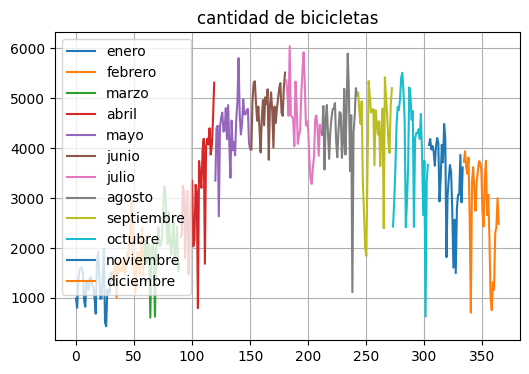

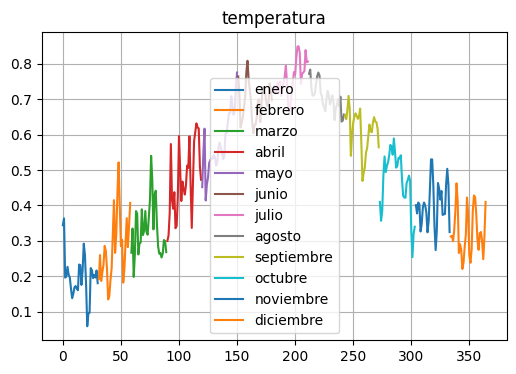

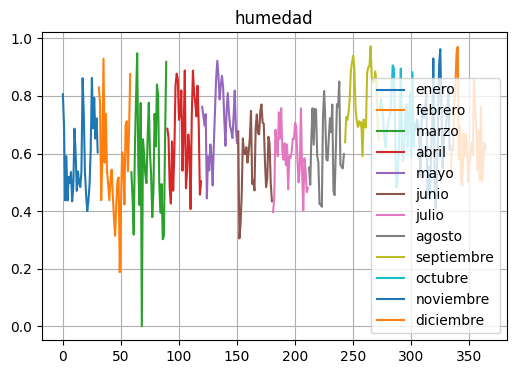

In [6]:
# Ahora graficamos a los largo de 1 año, la cantidad de bicicletas usadas
# y la temperatura día x día
# nos copiamos de df original para traer el año

data_plot_2 = df[['dteday','cnt','mnth','yr', 'temp','hum']]
data_plot_0= data_plot_2[data_plot_2['yr']==0]

# ploteamos cantidad de bicis para el año 0, dia a dia
plt.figure()
for x in range(1,13):
    data_plot_0[data_plot_0['mnth']==x]['cnt'].plot(figsize=(6,4))
plt.legend(meses)
plt.grid()
plt.title('cantidad de bicicletas')

# ploteamos temperatura para el año 0, dia a dia
plt.figure()
for x in range(1,13):
    data_plot_0[data_plot_0['mnth']==x]['temp'].plot(figsize=(6,4))
plt.legend(meses)
plt.grid()
plt.title('temperatura')
plt.show()

# ploteamos humedad para el año 0, dia a dia
plt.figure()
for x in range(1,13):
    data_plot_0[data_plot_0['mnth']==x]['hum'].plot(figsize=(6,4))
plt.legend(meses)
plt.grid()
plt.title('humedad')
plt.show()

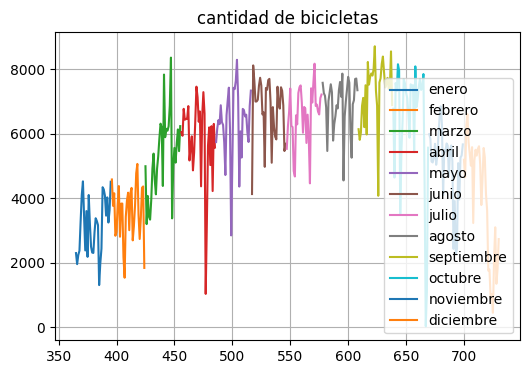

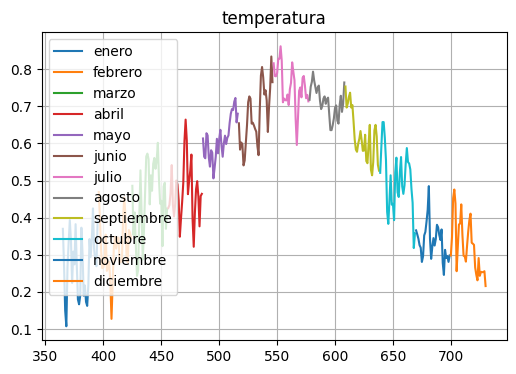

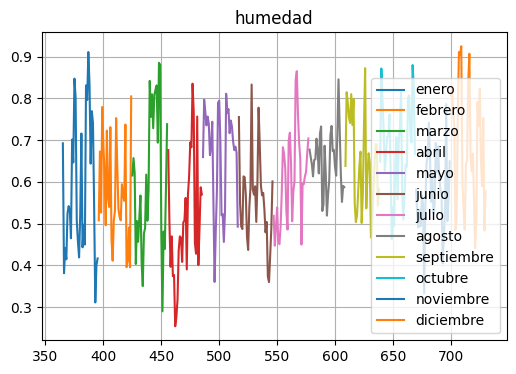

In [7]:
# Ahora graficamos a los largo de 1 año, la cantidad de bicicletas usadas
# y la temperatura día x día
# nos copiamos de df original para traer el año

data_plot_2 = df[['dteday','cnt','mnth','yr', 'temp','hum']]
data_plot_0= data_plot_2[data_plot_2['yr']==1]

# ploteamos cantidad de bicis para el año 0, dia a dia
plt.figure()
for x in range(1,13):
    data_plot_0[data_plot_0['mnth']==x]['cnt'].plot(figsize=(6,4))
plt.legend(meses)
plt.grid()
plt.title('cantidad de bicicletas')

# ploteamos temperatura para el año 0, dia a dia
plt.figure()
for x in range(1,13):
    data_plot_0[data_plot_0['mnth']==x]['temp'].plot(figsize=(6,4))
plt.legend(meses)
plt.grid()
plt.title('temperatura')
plt.show()

# ploteamos humedad para el año 0, dia a dia
plt.figure()
for x in range(1,13):
    data_plot_0[data_plot_0['mnth']==x]['hum'].plot(figsize=(6,4))
plt.legend(meses)
plt.grid()
plt.title('humedad')
plt.show()

In [8]:
# escalamos la cantidad
scaler = MinMaxScaler()
df_red['cnt_Scaled'] = scaler.fit_transform(df_red[['cnt']])
df_red.drop(['hum', 'cnt'], axis=1, inplace=True)
df_red.head()

,dteday,mnth,temp,cnt_Scaled
0,2011-01-01,1,0.344167,0.110792
1,2011-01-02,1,0.363478,0.089623
2,2011-01-03,1,0.196364,0.152669
3,2011-01-04,1,0.200000,0.177174
4,2011-01-05,1,0.226957,0.181546


In [9]:
# armamos una array con los datos de entrenamiento
x_y = np.array(df_red[['mnth', 'temp', 'cnt_Scaled']])

#x_y = x_y[0:365,:]

print(x_y.shape)


(731, 3)


In [10]:
x_y[0:5]

array([[1.        , 0.344167  , 0.11079153],
       [1.        , 0.363478  , 0.08962264],
       [1.        , 0.196364  , 0.15266912],
       [1.        , 0.2       , 0.17717441],
       [1.        , 0.226957  , 0.18154625]])

In [11]:
# armamos un diccionario que me mapee el mes del df a un índex
# esto es así por que en el df no tenemos los nombres con meses,
# sinó con números
mes_to_ix = {mes: i for i, mes in enumerate(np.arange(1,13))}

print('diccionario de vocabulario')
mes_to_ix



diccionario de vocabulario


{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11}

In [12]:
mes_to_ix[1]

0

In [13]:
class red_emb(nn.Module):
    def __init__(self, n_input = 1, vocab_size=12, embedding_dim=2, pretrained = True):
        super(red_emb, self).__init__()
        if pretrained:
            self.embeddings = nn.Embedding.from_pretrained(torch.ones([vocab_size,embedding_dim]), freeze=False)
        else:
            self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(n_input + embedding_dim, 1)

    def forward(self, x, mes):
        embeds = self.embeddings(mes).view((1, -1))
        final_input = torch.cat([x, embeds], dim=1)
        out = self.linear1(final_input)
        return out

In [18]:
losses = []
loss_function = nn.MSELoss()

model = red_emb(n_input = 1, vocab_size=12, embedding_dim=2, pretrained=True)


optimizer = optim.SGD(model.parameters(), lr=0.05)#, momentum=0.1)

emb_partida = np.copy(model.embeddings.weight.detach().numpy())
print(emb_partida)

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


6.109176118664663
3.481234144889494
3.5923746621143304
3.448429422545629
3.409424849209948
3.4399753556997434
3.297322477310769
3.3675993199321157
3.3526617490395134
3.281295945868939


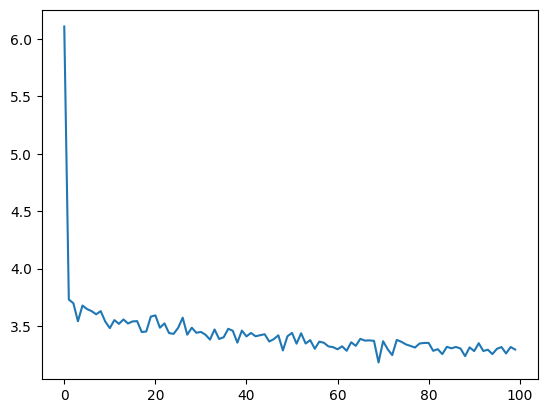

In [19]:
for epoch in range(100):
    total_loss = 0
    largo = len(x_y)
    # armo un vector de indices random para leer
    # mi matriz de datos de forma aleatoria
    index_rand = np.random.permutation(largo)
    for i in range(largo): # barro todo de set de entrenamiento
      # saco el índice de ese vector de indices random
      indice = index_rand[i]
      # saco el mes y le paso por el mes_to_ix
      mes_i = x_y[indice,0]
      mes_idxs = torch.tensor(mes_to_ix[mes_i], dtype=torch.long)
      # saco las otras variables
      x =  torch.tensor([[x_y[indice,1]]], dtype=torch.long)

      # saco el valor deseado
      target = torch.tensor([[x_y[indice,2]]])

      # preparo el  modelo (limpio el gradiente)
      model.zero_grad()

      # le paso al modelo la input (la x y los meses para el embedding)
      pred = model(x, mes_idxs)

      # calculo la loss
      loss = loss_function(pred.float(), target.float())

      # Step 5. Do the backward pass and update the gradient
      loss.backward()
      optimizer.step()

      # Get the Python number from a 1-element Tensor by calling tensor.item()
      total_loss += loss.item()

    losses.append(total_loss) # para cada epoch, guardo la loss
    # imprimo resultados cada 10 epochs
    if (int(epoch) % 10) == 0:
        print(total_loss/largo*100)
        # print(model.embeddings.weight[word_to_ix[1]])
        # print(model.linear1.weight[0])

plt.plot(np.array(losses)/largo*100)
plt.show()

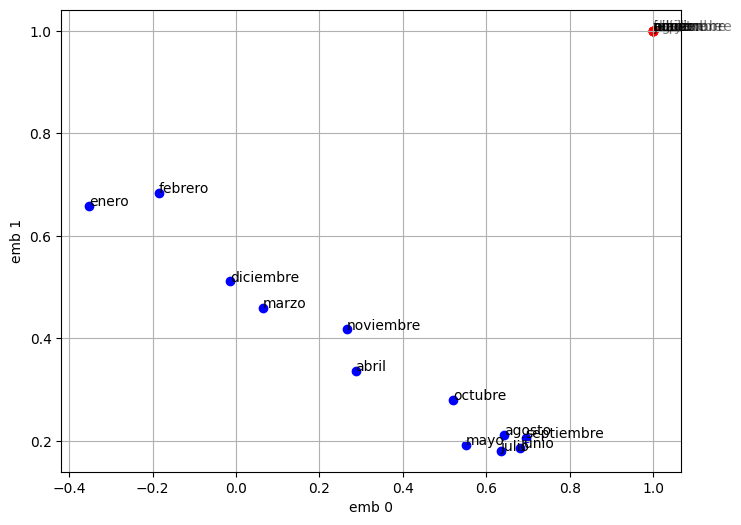

In [20]:
# para graficar un embedding de dimensión 2

fig = plt.figure(figsize=[8,6])
ax = fig.add_subplot()

# tomo los embeddings
emb = model.embeddings.weight.detach().numpy()

ax.scatter(emb[:,0], emb[:,1], color='b')
ax.scatter(emb_partida[:,0], emb_partida[:,1], color='r', alpha=0.5)
#ax.scatter(1, 1, c='red')


plt.xlabel('emb 0')
plt.ylabel('emb 1')

# Etiquetamos cada punto para mayor claridad

texts = [ax.text(emb[i,0], emb[i,1], txt) for i,
       txt in enumerate(meses)]

texts = [ax.text(emb_partida[i,0], emb_partida[i,1], txt, alpha=0.5) for i,
       txt in enumerate(meses)]

plt.grid()
plt.show()

IndexError: index 2 is out of bounds for axis 1 with size 2

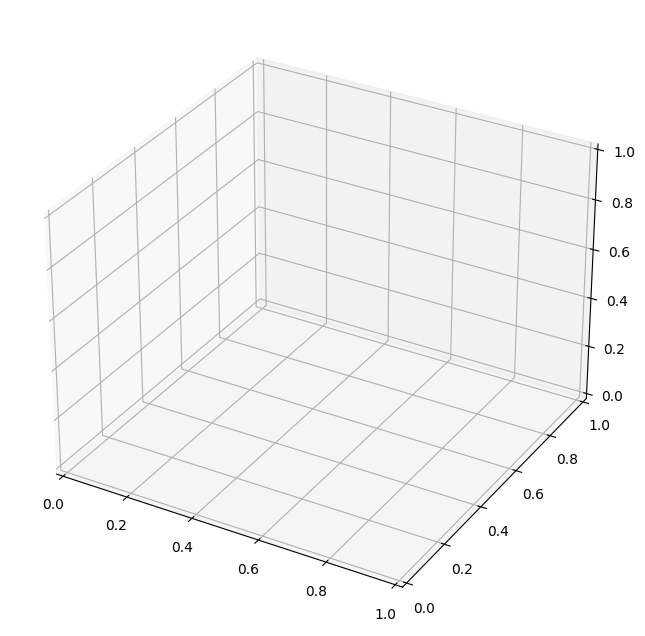

In [21]:
# para graficar un embedding de dimensión 3

emb = model.embeddings.weight.detach().numpy()
fig = plt.figure(figsize=[15,8])
ax = fig.add_subplot(projection='3d')
ax.scatter(emb[:,0], emb[:,1], emb[:,2])
ax.scatter(emb_partida[:,0], emb_partida[:,1], emb_partida[:,2], color='r', alpha=0.5)
#ax.scatter(1, 1, 1, c='red')
#ax.scatter(0, 0, 0, c='red')


plt.xlabel('emb 0')
plt.ylabel('emb 1')
ax.set_zlabel('emb 2')
# Etiquetamos cada punto para mayor claridad

texts = [ax.text(emb[i,0], emb[i,1], emb[i,2], txt) for i,
       txt in enumerate(meses)]

texts = [ax.text(emb_partida[i,0], emb_partida[i,1], emb_partida[i,2], txt, alpha=0.5) for i,
       txt in enumerate(meses)]

ax.view_init(*(45, +5))
plt.show()